# Load Cora dataset

In [1]:
from torch_geometric import datasets
import networkx as nx
import matplotlib.pyplot as plt

In [53]:
def draw_weighted_graph(G: nx.Graph, node_features: dict = None, fname: str = None):
    fig = plt.figure() # figsize=(8, 8)

    # ---Visualization 
    pos = nx.spring_layout(G, seed=7) # positions for all nodes - seed for reproducibility
    nx.draw_networkx_nodes(G, pos, node_size=700) # nodes
    nx.draw_networkx_edges(G, pos, width=6) # edges

    # node feature
    # if node_features is None:
    #     node_features = nx.get_node_attributes(G, "feat")
    #     node_features = {idx: f"{idx:d}" for idx, val in node_features.items()}
    # # print('node_features', node_features)
    # nx.draw_networkx_labels(G, pos, labels=node_features) #font_size=20, font_family="sans-serif") # node labels
    
    # edge weight labels
    # edge_weights = nx.get_edge_attributes(G, "weight")
    # nx.draw_networkx_edge_labels(G, pos, edge_weights)

    ax = plt.gca() # to get the current axis
    ax.margins(0.08) # to avoid the nodes being clipped
    plt.axis("off") # to turn of the axis
    plt.tight_layout() # to make sure nothing gets clipped

In [2]:
dataset = datasets.Planetoid(root='__data/Cora', name='Cora', split='public')
print(f'Length of dataset: {dataset.len()}')
print(dataset[0])
print(dataset[0].is_undirected())
print(dataset.num_classes)

Processing...


Length of dataset: 1
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
True
7


Done!


- dataset.x :  Node feature matrix (Nb_nodes, nb_features)
- dataset.edge_index : graph connectivity (2, Nb_edges) with type torch.long , and, here, value between 0 and Nb_nodes-1
- dataset.y : target to train (Nb_nodes) 
- dataset.pos : node position matrix with shape [num_nodes, num_dimensions]
- train_mask, val_mask, test_mask : Mask of values of dataset used for training, validation, testing respectively

In [3]:
train_mask = dataset.train_mask
print(train_mask.shape)
#dataset.x[train_mask, :]
dataset.edge_index

torch.Size([2708])


tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

In [51]:
G = nx.Graph()
nb_nodes = len(dataset.y)
for i in range(nb_nodes):
    G.add_node(i, label=dataset.y[i])

In [52]:
for edge in dataset.edge_index.T :
    G.add_edge(edge[0], edge[1])
    print(edge)


tensor([  0, 633])
tensor([   0, 1862])
tensor([   0, 2582])
tensor([1, 2])
tensor([  1, 652])
tensor([  1, 654])
tensor([2, 1])
tensor([  2, 332])
tensor([   2, 1454])
tensor([   2, 1666])
tensor([   2, 1986])
tensor([   3, 2544])
tensor([   4, 1016])
tensor([   4, 1256])
tensor([   4, 1761])
tensor([   4, 2175])
tensor([   4, 2176])
tensor([   5, 1629])
tensor([   5, 1659])
tensor([   5, 2546])
tensor([  6, 373])
tensor([   6, 1042])
tensor([   6, 1416])
tensor([   6, 1602])
tensor([  7, 208])
tensor([  8, 269])
tensor([  8, 281])
tensor([   8, 1996])
tensor([  9, 723])
tensor([   9, 2614])
tensor([ 10, 476])
tensor([  10, 2545])
tensor([  11, 1655])
tensor([  11, 1839])
tensor([  12, 1001])
tensor([  12, 1318])
tensor([  12, 2661])
tensor([  12, 2662])
tensor([  13, 1701])
tensor([  13, 1810])
tensor([ 14, 158])
tensor([  14, 2034])
tensor([  14, 2075])
tensor([  14, 2077])
tensor([  14, 2668])
tensor([  15, 1090])
tensor([  15, 1093])
tensor([  15, 1271])
tensor([  15, 2367])
tenso

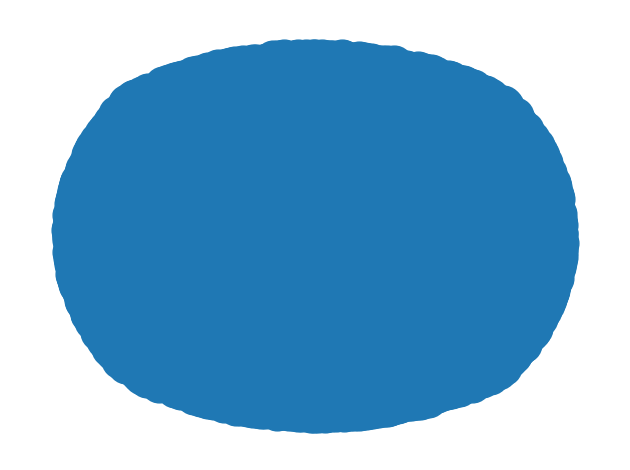

In [54]:
draw_weighted_graph(G)